# Excercise 2c
Authors: Moro Palma Loris, Vedasri Nakka, Mirko Bristle, Alexandra Kovacs, Michael Brunner


Deadline: April 19, 2021 (end of day) With this exercise we want you to build the foundation for your Pattern Recognition Framework. To do this you should still work on the MNIST dataset, with which you should be familiar by now. In this exercise you should aim to improve the recognition rate on the MNIST dataset using SVM.

In this exercise, you should train and test a basic CNN on the MNIST dataset. Use the incomplete CNN implementation that you find on ILIAS (model_task2c.py). If you want, you can also play around with the architecture.
Additionally, there is a short individual task that you have to hand in through ILIAS. You will have to perform a forward pass manually. You can find instructions for this task in the PDF Serie_02c_individual.pdf.
CNN on MNIST

Complete the provided CNN implementation. Use the provided training set to train the CNN. Apply the trained CNN to classify the test set. Perform validation:

• Optimize learning rate (typically in the range [0.001, 0.1]).

• Optimize number of training iterations. Plot a graph showing the accuracy on the training set and the test set, respectively, with respect to the training epochs.

• Perform the random initialization several times and choose the best network during test- ing.

Expected Output

• Access to your github so that we can inspect your code.

• Small report in PDF / README format on the GitHub containing:

    – Plot showing the accuracy and loss on the training and the test set with respect to the training epochs.

    – Test accuracy with the best parameters found during testing.

• Individual: Manual forward-pass handed in through ILIAS.

structure of the code:
- downloading MNIST sets
- format images
- starting PR_CNN from model_task2c.py
- find best accuracy
- iterating over training set
- checking accuracy progress with testing set
- train network with best accuracy
- rendering results



In [3]:
%load_ext autoreload
%autoreload 2
from model_task2c import PR_CNN
import pandas as pd
import torch.nn as nn
import torch
import numpy as np
from matplotlib import pyplot as plt

# download data
train_data = pd.read_csv("data/mnist-csv-format/mnist_train.csv", header=0)
test_data = pd.read_csv("data/mnist-csv-format/mnist_test.csv", header=0)

# format training data
train_Y = train_data.iloc[:,0].to_numpy()
train_X = train_data.iloc[:,1:].to_numpy()
train_x = train_X.reshape(len(train_X), 1, 28, 28)
train_x = torch.from_numpy(train_x).float()/255
train_y = torch.from_numpy(np.array(train_Y))
train_s = torch.utils.data.TensorDataset(train_x, train_y)

# format test data
test_Y = test_data.iloc[:,0].to_numpy()
test_X = test_data.iloc[:,1:].to_numpy()
test_x = test_X.reshape(len(test_X), 1, 28, 28)
test_x = torch.from_numpy(test_x).float()/255
test_y = torch.from_numpy(np.array(test_Y))
test_s = torch.utils.data.TensorDataset(test_x, test_y)

print("training set size:", len(train_x), "testing set size:", len(test_x))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
training set size: 59999 testing set size: 9999


Parameters: learing rate = 0.001,  number of epochs = 10, batch size = 50
Epoch 1/10, Loss: 0.4714, Accuracy: 0.8129
Epoch 2/10, Loss: 0.3252, Accuracy: 0.8599
Epoch 3/10, Loss: 0.2742, Accuracy: 0.8758
Epoch 4/10, Loss: 0.2428, Accuracy: 0.8822
Epoch 5/10, Loss: 0.2219, Accuracy: 0.8905
Epoch 6/10, Loss: 0.2034, Accuracy: 0.8968
Epoch 7/10, Loss: 0.1835, Accuracy: 0.9023
Epoch 8/10, Loss: 0.1595, Accuracy: 0.9096
Epoch 9/10, Loss: 0.1309, Accuracy: 0.9195
Epoch 10/10, Loss: 0.1032, Accuracy: 0.9296
Accuracy: 92.959%
-----------------
Parameters: learing rate = 0.005,  number of epochs = 10, batch size = 50
Epoch 1/10, Loss: 0.2607, Accuracy: 0.8754
Epoch 2/10, Loss: 0.1277, Accuracy: 0.9157
Epoch 3/10, Loss: 0.0382, Accuracy: 0.9487
Epoch 4/10, Loss: 0.0289, Accuracy: 0.9578
Epoch 5/10, Loss: 0.0302, Accuracy: 0.9626
Epoch 6/10, Loss: 0.0300, Accuracy: 0.9659
Epoch 7/10, Loss: 0.0274, Accuracy: 0.9697
Epoch 8/10, Loss: 0.0249, Accuracy: 0.9722
Epoch 9/10, Loss: 0.0226, Accuracy: 0.973

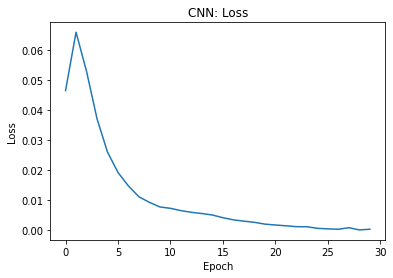

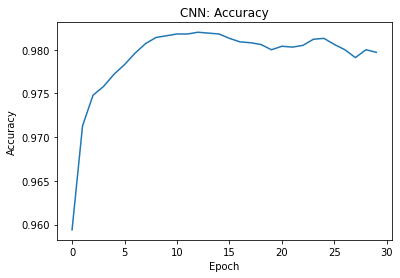

Best Accuracy: 97.970%


In [4]:

# global variables for training
batch_size = 50

# build train_loader with according batch_size
train_loader = torch.utils.data.DataLoader(train_s, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_s, batch_size=batch_size, shuffle=False)

def train(l_rate, num_epochs):
    cnn = PR_CNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(cnn.parameters(), lr=l_rate)
    print(f'Parameters: learing rate = {l_rate},  number of epochs = {num_epochs}, batch size = {batch_size}')

    acc_list, loss_list = [], []
    iter_list, counter = [], 0
    # iterate training set
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            counter += 1
            outputs = cnn(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # test accuracy with test set
        correct, total = 0, 0
        for i, (images_test, labels_test) in enumerate(test_loader):
            outputs_t = cnn(images_test)
            predicted = torch.max(outputs_t.data, 1)[1]
            total += len(labels_test)
            correct += (predicted == labels_test).sum()
        acc_list.append(correct / total)
        loss_list.append(loss.data)
        print (f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.sum():.4f}, Accuracy: {correct / total:.4f}')
    accuracy_set.append(acc_list[-1])
    print(f'Accuracy: {100 * correct / total:.3f}%')
    print("-----------------")
    return acc_list, loss_list


lr_set = [.001, .005, .01, .02, .05]
accuracy_set = []


def find_best_learning_rate():
    for l_r in lr_set:
        train(l_rate=l_r, num_epochs=10)
    learning_rate = lr_set[accuracy_set.index(max(accuracy_set))]
    print("Best learning rate:", learning_rate)
    return learning_rate


def train_with_best_parameters():
    learning_rate = find_best_learning_rate()
    best_acc_list, best_loss_list = [], []
    best_acc = []
    for i in range(3):
        acc_list, loss_list = train(learning_rate, num_epochs=30)
        best_acc_list.append(acc_list)
        best_loss_list.append(loss_list)
        best_acc.append(acc_list[-1])

    # plot accuracy and loss
    plt.plot(best_loss_list[best_acc.index(max(best_acc))])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("CNN: Loss")
    plt.show()

    plt.plot(best_acc_list[best_acc.index(max(best_acc))])
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("CNN: Accuracy")
    plt.show()

    print(f'Best Accuracy: {100 * best_acc_list[best_acc.index(max(best_acc))][-1]:.3f}%')


train_with_best_parameters()

Results

Best learning rate: 0.02

Optimal number of epochs:

The optimal number of epochs differs depending on the learning rate.
The bigger the learning rate the fewer epochs needed until it converges.

i.e. learning rate | approximate number of epochs until converge

0.05  | 3

0.02  | 7

0.005 | 10+